In [ ]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the config of the plots we will create

# Read in the data

df = pd.read_csv('/Users/nocap/Downloads/movies.csv')

In [18]:
#let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Checking for Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

In [14]:
df = df.dropna() #dropping rows with null Values


In [15]:
# Checking for Missing Data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
   
   

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [16]:
# Perfect, All Null Values removed

In [ ]:
# Data Types for our coloums

df.dtypes

In [27]:
# Changing Data types of columns DATA CLEANING

df['budget'] = df['budget'].astype('int64') # removing decimal points

df['gross'] = df['gross'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

df['votes'] = df['votes'].astype('int64')



In [34]:
# The release year and the relase date show different years.
# Making an extra coloum of years from release data column

df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')

# (\d{4}) extracts 4 consecutive digits from a string.

In [38]:
df['year'] = df['yearcorrect']   # copying corrected years to years columns


df = df.drop('yearcorrect', axis=1)  # deleting the yearcorrect column

In [ ]:
df.sort_values(by = ['gross'], inplace = False, ascending= False )

In [ ]:
df

In [42]:
# budget high correlation to gross hypothesis
# same with company and gross

In [ ]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.ylabel('Gross Earnings')
plt.xlabel('Film Budget')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

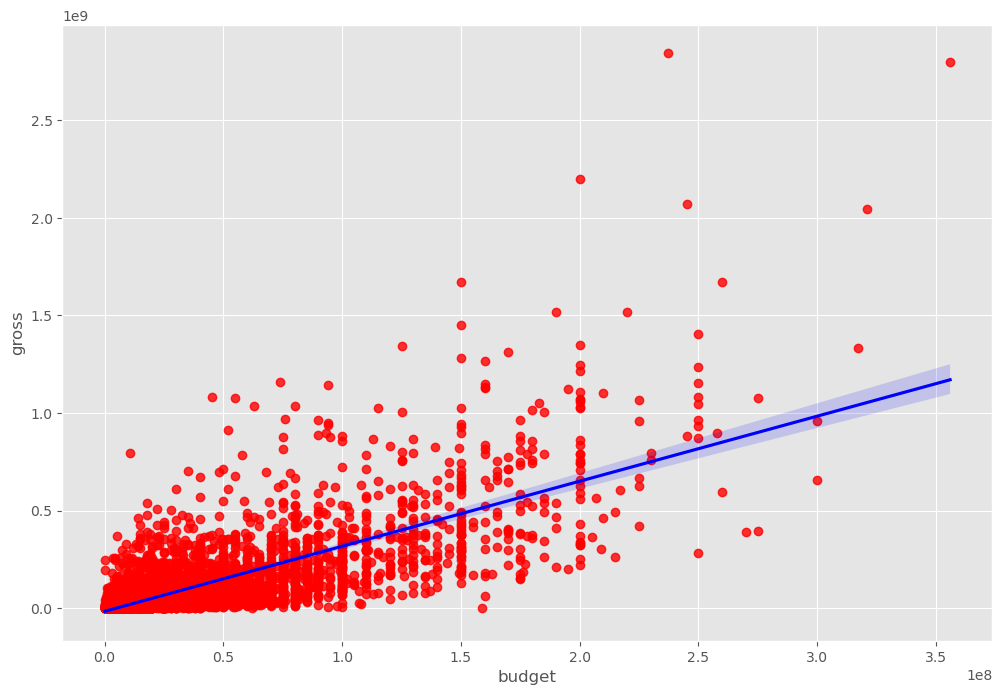

In [47]:
#plot the budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws ={"color": "red"}, line_kws = {"color":"blue"} )

In [53]:
# Let's Start looking at correlation

df.corr() 
#types of correlation default(pearson), kendall, spearman
# df.corr(method='kendall')



,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
# High Correlation between budget and gross is right

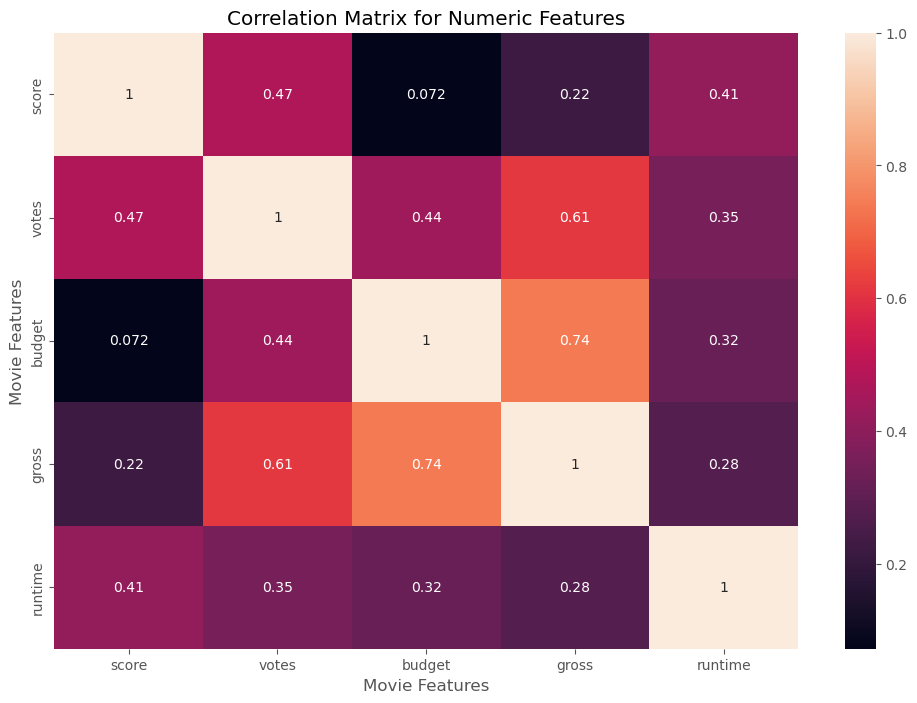

In [57]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [58]:
#Look at Company and Earning Co-Relation
#Company is not Numeric

#So we will convert it to represent it as number like xcompany >1, y company > 2


df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes #Assign random numbers to each category
        

df_numerized
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,0,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,0,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,0,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,0,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,40,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124
7649,3556,4,0,40,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99
7650,1153,4,1,40,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101
7651,3978,4,1,40,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100


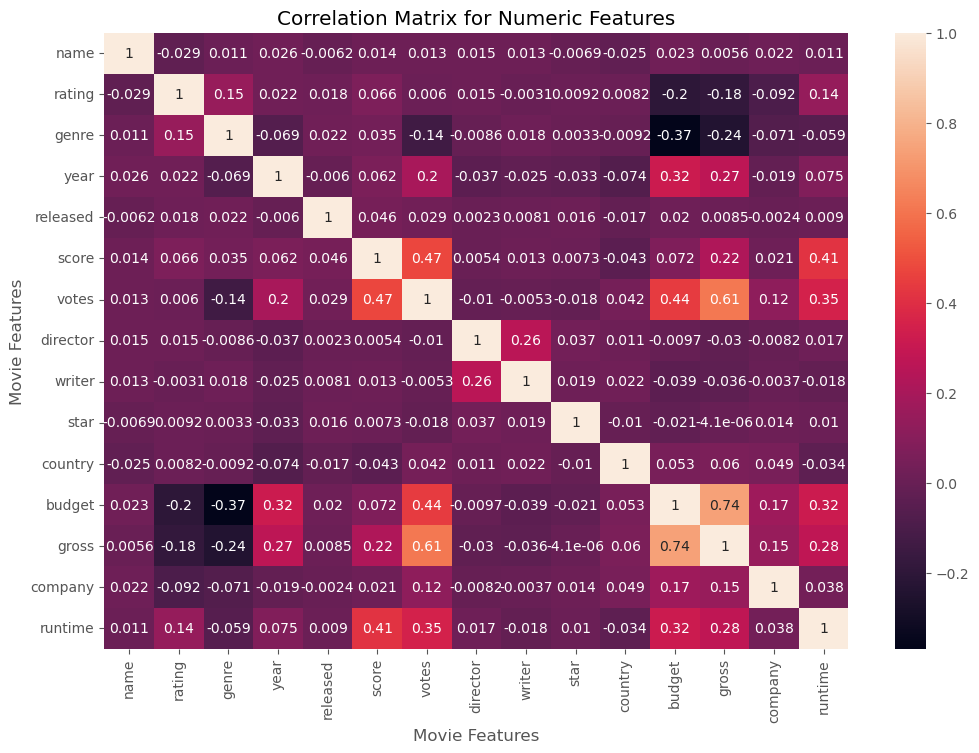

In [59]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.ylabel('Movie Features')
plt.xlabel('Movie Features')

plt.show()

In [60]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.022021,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.069147,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.022021,-0.069147,1.000000,-0.005989,0.061923,0.203098,-0.037371,-0.025495,-0.032687,-0.073569,0.320312,0.268721,-0.018806,0.075294
released,-0.006152,0.018083,0.022142,-0.005989,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.061923,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.203098,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.037371,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025495,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032687,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


In [61]:
# UNSTACKING to seeing high correlated feature easily

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [63]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
gross    genre     -0.244101
genre    gross     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [67]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

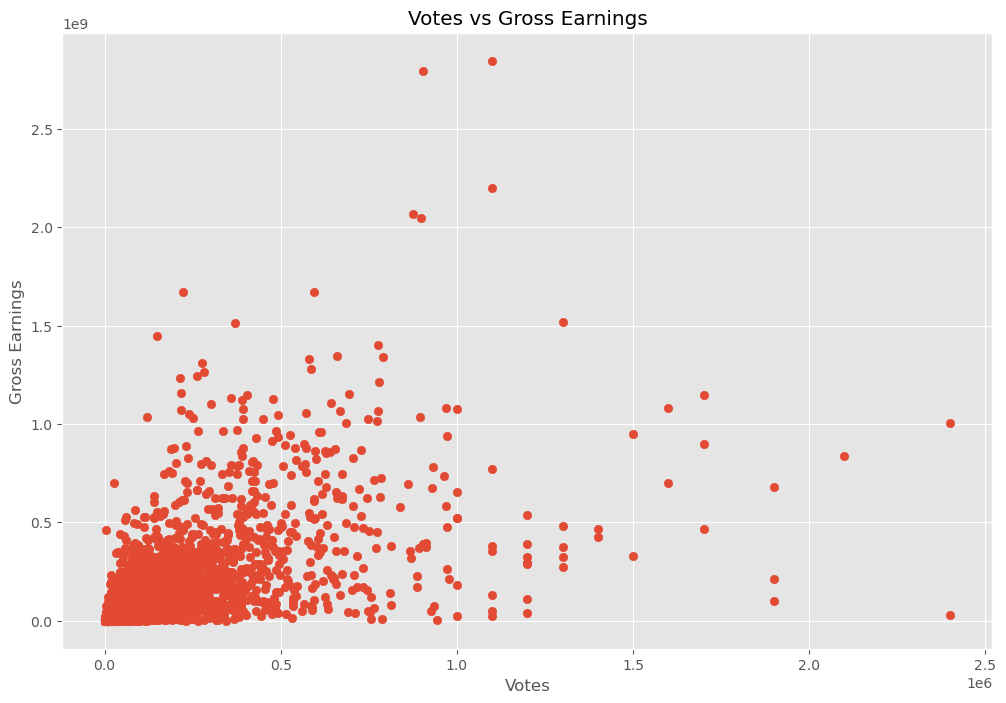

In [71]:
#Votes and budget have the highest correlation to gross earnings

#company has low correlation
# We were wrong


plt.scatter(x=df_numerized['votes'], y = df_numerized['gross'])

plt.title('Votes vs Gross Earnings')

plt.ylabel('Gross Earnings')
plt.xlabel('Votes')

plt.show()
